In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [4]:
df = pd.read_csv(r"E:\Reyhane\Data for Project for the future\archiveSIR\per_location_fitted_params.csv")

In [6]:
data = df[df["Country"] == "Iran"].iloc[0]

In [8]:
data

Province                                 NaN
Country                                 Iran
R0                                  2.388901
Beta                                 0.13182
Gamma                                0.05518
FirstDayNum                               53
FirstDate                         2020-02-22
FirstDayInfectedCount                   1315
PeakDayNum                               200
PeakDate                          2020-07-18
PeakDayInfectedCount              17602010.0
TotalPopulation                   81160000.0
PopFactor                                1.0
EstimatedSusceptiblePopulation    81160000.0
Loss                                701.7715
Name: 125, dtype: object

In [44]:
beta = data["Beta"]
gamma = data["Gamma"]
N = data["TotalPopulation"]
I0 = data["FirstDayInfectedCount"]
S0 = N - I0
R0 = 0
S0

81158685.0

In [12]:
def sir_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

In [22]:
days = 250
t = np.linspace(0, days, days)

In [24]:
y0 = [S0, I0, R0]

In [26]:
solution = odeint(sir_model, y0, t, args=(N, beta, gamma))
S, I, R = solution.T

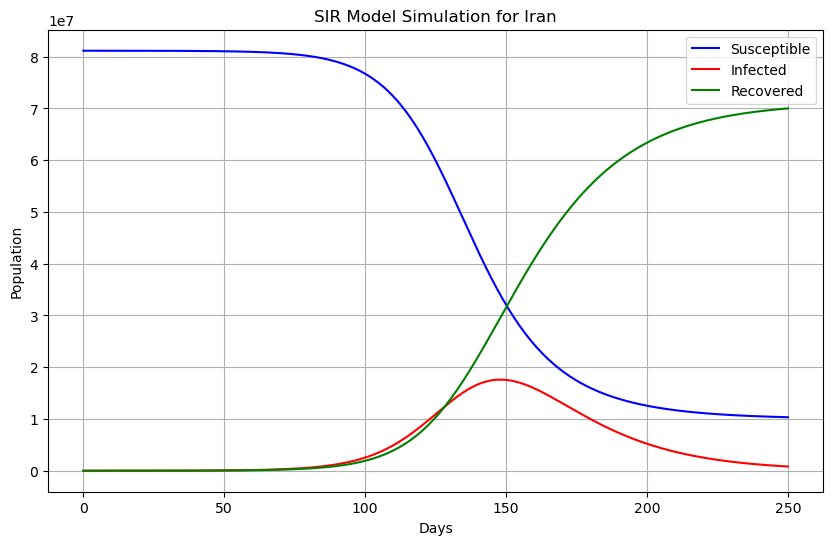

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(t, S, label="Susceptible", color="blue")
plt.plot(t, I, label="Infected", color="red")
plt.plot(t, R, label="Recovered", color="green")
plt.xlabel("Days")
plt.ylabel("Population")
plt.title(f"SIR Model Simulation for {"Iran"}")
plt.legend()
plt.grid()
plt.show()